# Практика №5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from typing import Tuple, Optional

## Задача №1

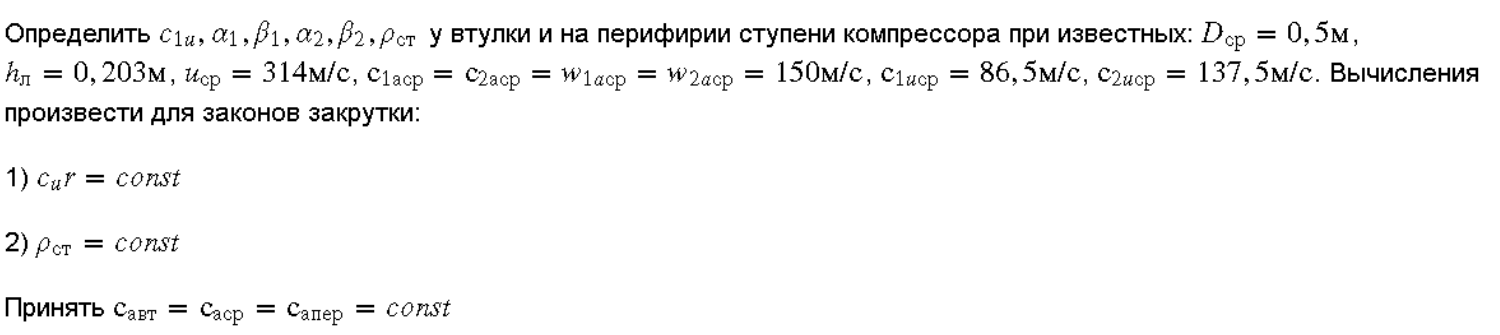

Переопределим в задаче диаметр с 0.5 м до 1.1 м

In [2]:
average_diameter = 1.1
blade_length = 0.203
u = 314
c_1_a = 150
c_2_a = 150
w_1_a = 150
w_2_a = 150
c_1_u = 86
c_2_u = 137.5

R = 287
k = 1.4

Посчитаем треугольники скоростей на среднем диаметре

In [3]:
alpha_1 = np.rad2deg(np.arctan(c_1_a / c_1_u))
alpha_1

60.17291534552527

In [4]:
alpha_2 = np.rad2deg(np.arctan(c_2_a / c_2_u))
alpha_2

47.489552921999156

In [5]:
w_1_u = u - c_1_u

beta_1 = np.rad2deg(np.arctan(w_1_a / w_1_u))
beta_1

33.340707346477004

In [6]:
w_2_u = u - c_2_u

beta_2 = np.rad2deg(np.arctan(w_2_a / w_2_u))
beta_2

40.359824749134866

Посчитам граничные значения диаметров

In [7]:
d_hub = average_diameter - blade_length
d_shroud = average_diameter + blade_length
d_hub, d_shroud

(0.897, 1.3030000000000002)

In [8]:
def u_func(d):
    """
    Окружная скорость для любого диаметра из [d_hub, d_shroud]
    """
    if isinstance(d, (int, float)):
        if d >= d_hub and d <= d_shroud:
            return u * d / average_diameter
        else:
            raise ValueError(f"d should be within [{d_hub}, {d_shroud}]")
    else:
        if all(d >= d_hub) and all(d <= d_shroud):
            return u * d / average_diameter
        else:
            raise ValueError(f"d should be within [{d_hub}, {d_shroud}]")

In [9]:
u_func(d=d_hub), u_func(d_shroud)

(256.0527272727273, 371.9472727272727)

Подсчитаем теплоперепад на лопатку

In [10]:
heat_drop = (c_2_u - c_1_u) * u
heat_drop

16171.0

Подсчитаем степень реактивности на среднем диаметре

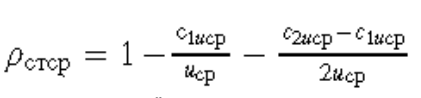

In [11]:
degree_of_reaction = 1 - (c_1_u / u) - ((c_2_u - c_1_u) / (2 * u))
degree_of_reaction

0.6441082802547772

### Закон постоянства циркуляции
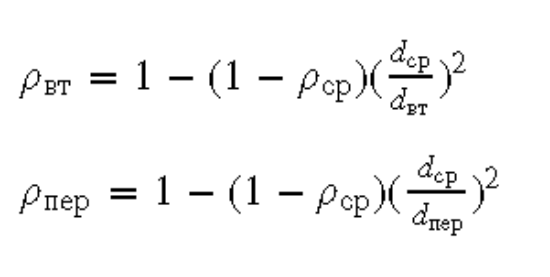

In [12]:
def speed_circulation_law(d, speed):
    return speed * average_diameter / d


c_1_u_circulation = partial(speed_circulation_law, speed=c_1_u)
c_2_u_circulation = partial(speed_circulation_law, speed=c_2_u)

### Закон постоянства степени реактивности из учебников

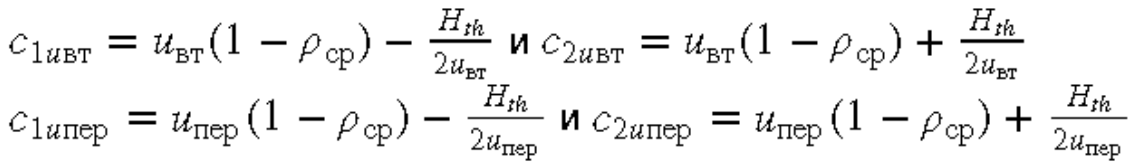

In [13]:
def c_1_u_dor_constant(d):
    return u_func(d) * (1 - degree_of_reaction) - (heat_drop * 0.5 / u_func(d))

def c_2_u_dor_constant(d):
    return u_func(d) * (1 - degree_of_reaction) + (heat_drop * 0.5 / u_func(d))

In [14]:
def alpha_1_func(d, c_func):
    return np.rad2deg(np.arctan(c_1_a / c_func(d)))

def alpha_2_func(d, c_func):
    return np.rad2deg(np.arctan(c_2_a / c_func(d)))

def beta_1_func(d, c_func):
    return np.rad2deg(np.arctan(w_1_a / (u_func(d) - c_func(d))))

def beta_2_func(d, c_func):
    w_u = u_func(d) - c_func(d)
    w = (w_2_a ** 2 + w_u ** 2) ** 0.5
    return np.rad2deg(np.arccos(w_u / w))

In [15]:
def dor_func(d, c1_func, c2_func):
    return 1 - (c1_func(d) / u_func(d)) - ((c2_func(d) - c1_func(d)) / (2 * u_func(d)))

In [16]:
def heat_drop_func(d, c1_func, c2_func):
    return (c2_func(d) - c1_func(d)) * u_func(d)

In [17]:
def sample_values(func, *args):
    d = np.linspace(d_hub, d_shroud, 100)
    return func(d, *args), d

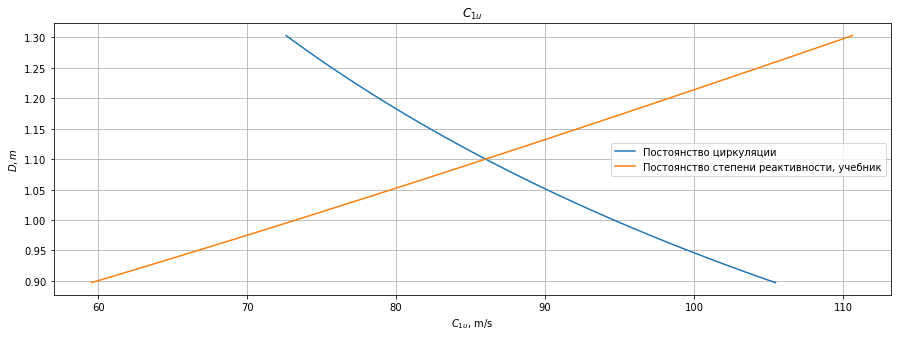

In [18]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(c_1_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(c_1_u_dor_constant), label='Постоянство степени реактивности, учебник')
ax.set_title("$C_{1u}$")
ax.set_xlabel("$C_{1u}$, m/s")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

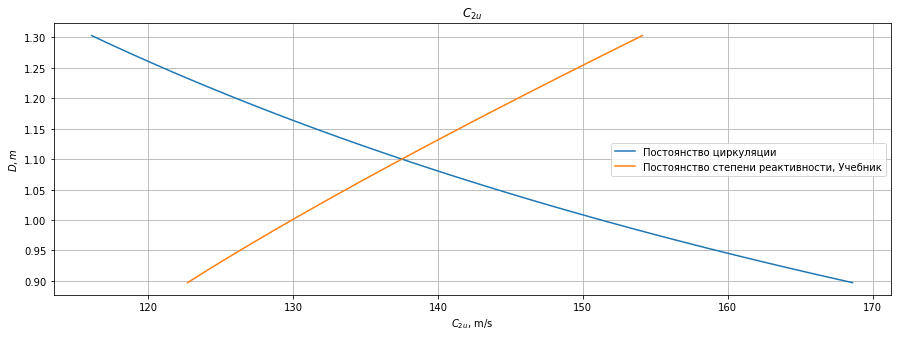

In [19]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(c_2_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(c_2_u_dor_constant), label='Постоянство степени реактивности, Учебник')
ax.set_title("$C_{2u}$")
ax.set_xlabel("$C_{2u}$, m/s")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

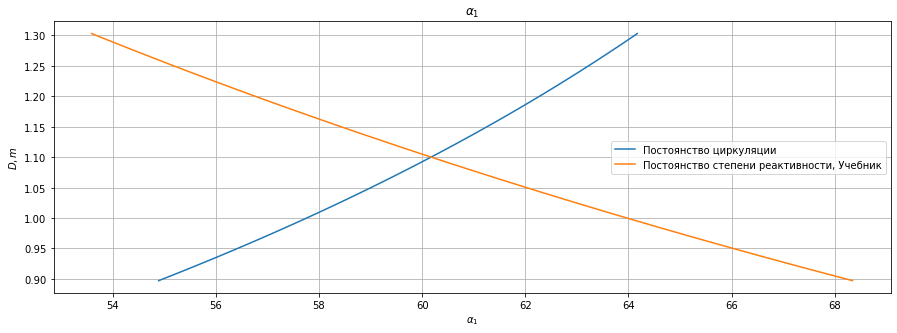

In [20]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(alpha_1_func, c_1_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(alpha_1_func, c_1_u_dor_constant), label='Постоянство степени реактивности, Учебник')
ax.set_title("$\\alpha_1$")
ax.set_xlabel("$\\alpha_1 $")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

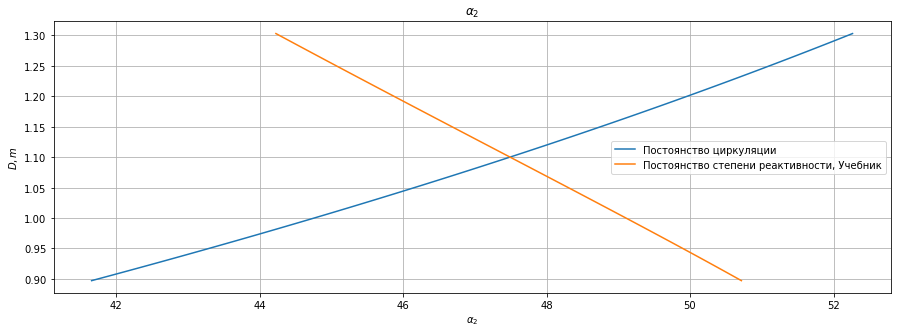

In [21]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(alpha_2_func, c_2_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(alpha_2_func, c_2_u_dor_constant), label='Постоянство степени реактивности, Учебник')
ax.set_title("$\\alpha_2$")
ax.set_xlabel("$\\alpha_2 $")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

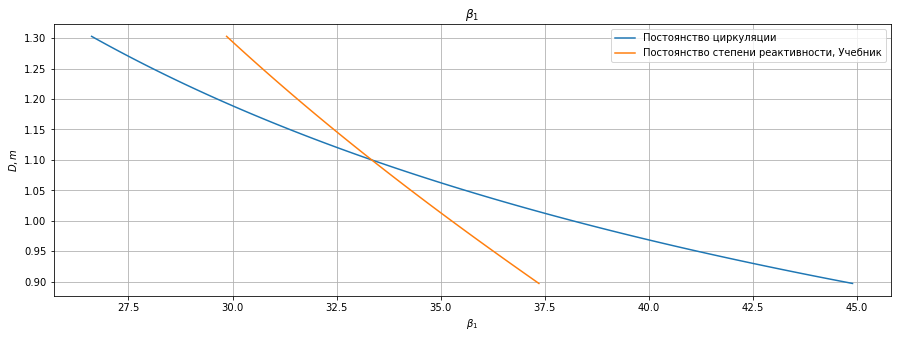

In [22]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(beta_1_func, c_1_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(beta_1_func, c_1_u_dor_constant), label='Постоянство степени реактивности, Учебник')
ax.set_title("$\\beta_1$")
ax.set_xlabel("$\\beta_1$")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

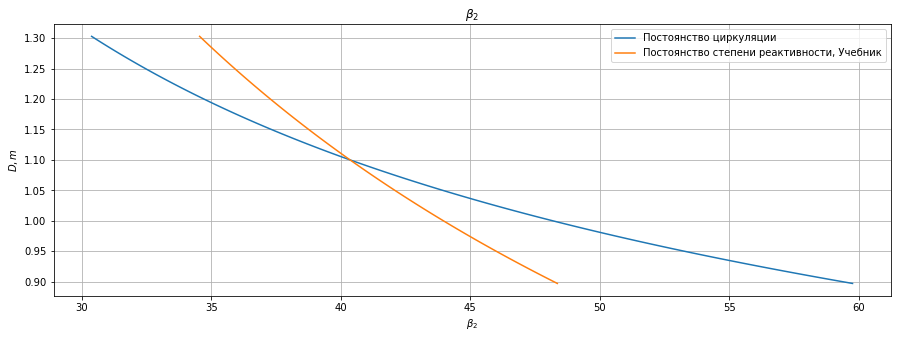

In [23]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(beta_2_func, c_2_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(beta_2_func, c_2_u_dor_constant), label='Постоянство степени реактивности, Учебник')
ax.set_title("$\\beta_2$")
ax.set_xlabel("$\\beta_2 $")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

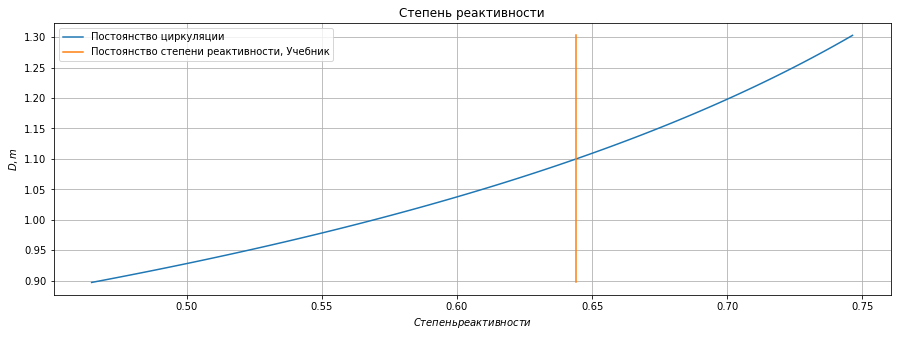

In [24]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(dor_func, c_1_u_circulation, c_2_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(dor_func, c_1_u_dor_constant, c_2_u_dor_constant), label='Постоянство степени реактивности, Учебник')
ax.set_title("Степень реактивности")
ax.set_xlabel("$Степень реактивности$")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

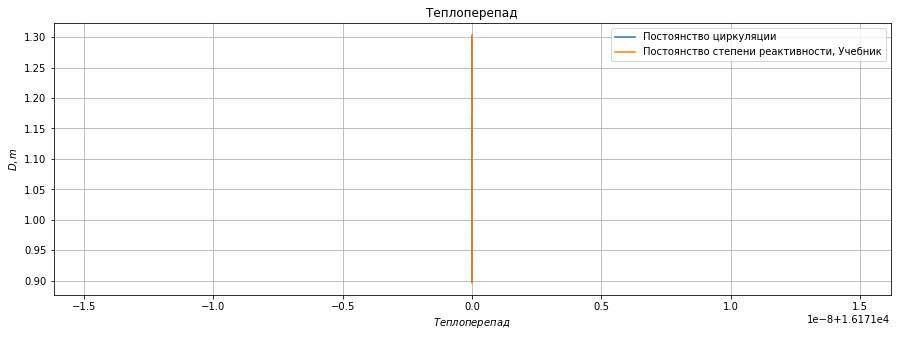

In [25]:
fig, ax = plt.subplots(1, figsize=(15,5))
ax.plot(*sample_values(heat_drop_func, c_1_u_circulation, c_2_u_circulation), label='Постоянство циркуляции')
ax.plot(*sample_values(heat_drop_func, c_1_u_dor_constant, c_2_u_dor_constant), label='Постоянство степени реактивности, Учебник')
ax.set_title("Теплоперепад")
ax.set_xlabel("$Теплоперепад$")
ax.set_ylabel("$D, m$")
ax.grid()
ax.legend();

# Примеры способов построения профиля

In [26]:
def naca_profile_coordinates(
    number: str,
    chord: float,
    points: int
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    m = int(number[0]) / 100.
    p = int(number[1]) / 10.
    t = int(number[2:]) / 100.
    
    x = np.linspace(0, chord, points)
    
    yc = np.where(
        x < p * chord,
        m * x / p ** 2 * (2 * p - x / chord),
        m * (chord - x) / (1 - p) ** 2 * (1 + x / chord - 2 * p)
    )
    
    theta = np.arctan(
        np.where(
            x < p * chord,
            2 * m / p ** 2 * (p - x / chord),
            2 * m / (1 - p) ** 2 * (p - x / chord)
        )
    )
    
    r = x / chord
    yt = 5 * t * chord * (
        0.2969 * r ** 0.5 - 0.1260 * r - 0.3516 * r ** 2 + 0.2843 * r ** 3 - 0.1015 * r ** 4
    )
    
    xu = x - yt * np.sin(theta)
    yu = yc + yt * np.cos(theta)
    
    xl = x + yt * np.sin(theta)
    yl = yc - yt * np.cos(theta)
    
    
    return xu, yu, xl, yl

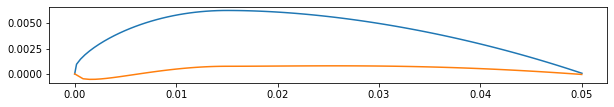

In [27]:
xu, yu, xl, yl = naca_profile_coordinates("7311", chord=0.05, points=100)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(xu, yu)
ax.plot(xl, yl)
ax.set_aspect("equal", adjustable="box")

# Площадь сечения произвольной лопатки

$$F = \int\limits_{x_{min}}^{x_{max}} \space \int\limits_{y_{lower}(x)}^{y_{upper}(x)} 1 \cdot dx \cdot dy$$

In [28]:
from scipy.integrate import dblquad

def get_area_of_profile(
    upper_line_points: np.ndarray,
    lower_line_points: np.ndarray,
) -> float:
    """
    Compute profile area in integral form
    :param np.ndarray upper_line_points: np.ndarray[X, Y] coordinates of upper profile line
    :param np.ndarray lower_line_points: np.ndarray[X, Y] coordinates of lower profile line
    :return Tuple[float, Callable, Callable]]:
    """
    upper_line_coefficients = np.polyfit(upper_line_points[:, 0], upper_line_points[:, 1], 17)
    upper_line = np.poly1d(upper_line_coefficients)

    lower_line_coefficients = np.polyfit(lower_line_points[:, 0], lower_line_points[:, 1], 17)
    lower_line = np.poly1d(lower_line_coefficients)

    x_min = min(min(upper_line_points[:, 0]), min(lower_line_points[:, 0]))
    x_max = max(max(upper_line_points[:, 0]), max(lower_line_points[:, 0]))

    profile_area = dblquad(
        lambda y, x: 1,
        a=x_min,
        b=x_max,
        gfun=lower_line,
        hfun=upper_line,
        epsrel=1e-16,
    )[0]
    return profile_area

In [29]:
get_area_of_profile(
    upper_line_points=np.vstack((xu, yu)).T,
    lower_line_points=np.vstack((xl, yl)).T
)

0.0001905641258616855

# Интерактивная отрисовка

In [30]:
from ipywidgets import interact, IntSlider


def plot_naca_profile(m: int, p: int, t: int):
    number = str(int(m)) + str(int(p)) + str(int(t))
    xu, yu, xl, yl = naca_profile_coordinates(number, chord=0.05, points=100)

    area = get_area_of_profile(
        upper_line_points=np.vstack((xu, yu)).T,
        lower_line_points=np.vstack((xl, yl)).T
    )
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    ax.plot(xu, yu)
    ax.plot(xl, yl)
    ax.set_aspect("equal", adjustable="box")
    x_text = min(min(xu), min(xl)) * 0.95
    y_text = max(max(yu), max(yl)) * 1.05
    ax.set_title(f"Profile type NACA {number} with Area: {round(area * 10000, 2)} $cm^2$")

interact(
    plot_naca_profile,
    m=IntSlider(min=1, max=9, step=1, value=2),
    p=IntSlider(min=1, max=9, step=1, value=4),
    t=IntSlider(min=1, max=99, step=1, value=21),
);

interactive(children=(IntSlider(value=2, description='m', max=9, min=1), IntSlider(value=4, description='p', m…

# Трехмерная отрисовка NACA профиля

In [31]:
def set_axes_equal(ax: Optional[plt.axes]) -> None:
    """
    Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc.
    :param matplotlib.pyplot.axes ax:a matplotlib axis, e.g., as output from plt.gca().
    :return None:
    """
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])


In [32]:
xu, yu, xl, yl = naca_profile_coordinates("7311", chord=0.05, points=100)

upper_line_points = np.vstack((xu, yu)).T
lower_line_points = np.vstack((xl, yl)).T
full_points = np.vstack((upper_line_points, lower_line_points[::-1]))

<IPython.core.display.Javascript object>


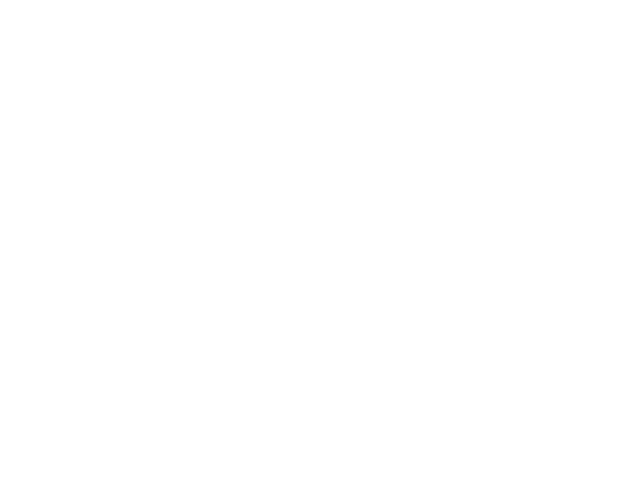

In [33]:
%matplotlib notebook

x = full_points[:, 0]
y = full_points[:, 1]

x = np.vstack((x, x)).T
y = np.vstack((y, y)).T
z = np.zeros_like(x).T
z[1] = 0.05
z = z.T

_, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(x, y, z)
ax.set_box_aspect([1.0, 1.0, 1.0])
set_axes_equal(ax)


In [34]:
numbers = [f"86{int(last)}" for last in range(11, 30, 1)]
blade_length = 0.05
z_values = np.linspace(0, blade_length, len(numbers) + 1)

x_to_stack = []
y_to_stack = []
z_to_stack = []


for number, z_val in zip(numbers, z_values):
    xu, yu, xl, yl = naca_profile_coordinates(number, chord=0.05, points=100)
    z = np.ones_like(xu) * z_val
    upper_line_points = np.vstack((xu, yu, z)).T
    lower_line_points = np.vstack((xl, yl, z)).T
    full_points = np.vstack((upper_line_points, lower_line_points[::-1]))
    x_coordinates = full_points[:, 0]
    y_coordinates = full_points[:, 1]
    z_coordinates = full_points[:, 2]
    
    x_to_stack.append(x_coordinates)
    y_to_stack.append(y_coordinates)
    z_to_stack.append(z_coordinates)

x_stacked = np.vstack(x_to_stack).T
y_stacked = np.vstack(y_to_stack).T
z_stacked = np.vstack(z_to_stack).T

<IPython.core.display.Javascript object>


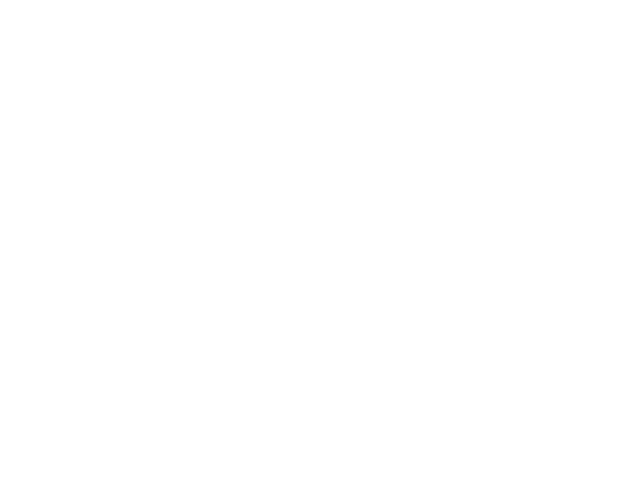

In [35]:
%matplotlib notebook

_, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(x_stacked, y_stacked, z_stacked)
ax.set_box_aspect([1.0, 1.0, 1.0])
set_axes_equal(ax)

# Решетки турбин

In [36]:
from profiles.profile_model import BladeProfile

In [42]:
profile = BladeProfile(
    inlet_angle=90,
    outlet_angle=20,
    inlet_speed=50, 
    outlet_speed=200,
    mach=0.6,
    chord=52.88 / 1000,
    diameter=1.2,
)

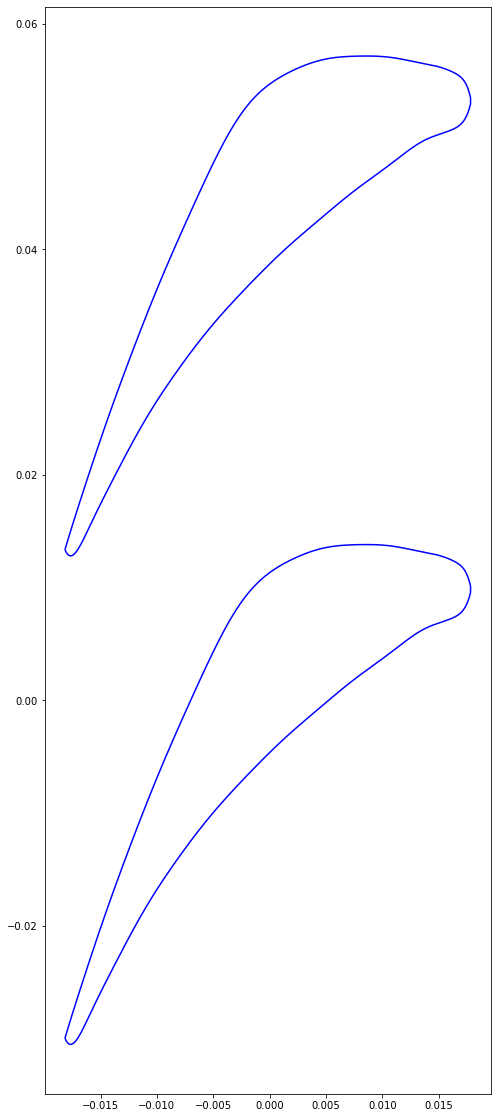

In [44]:
%matplotlib inline
profile.plot_profile(blade2blade=True)

<IPython.core.display.Javascript object>


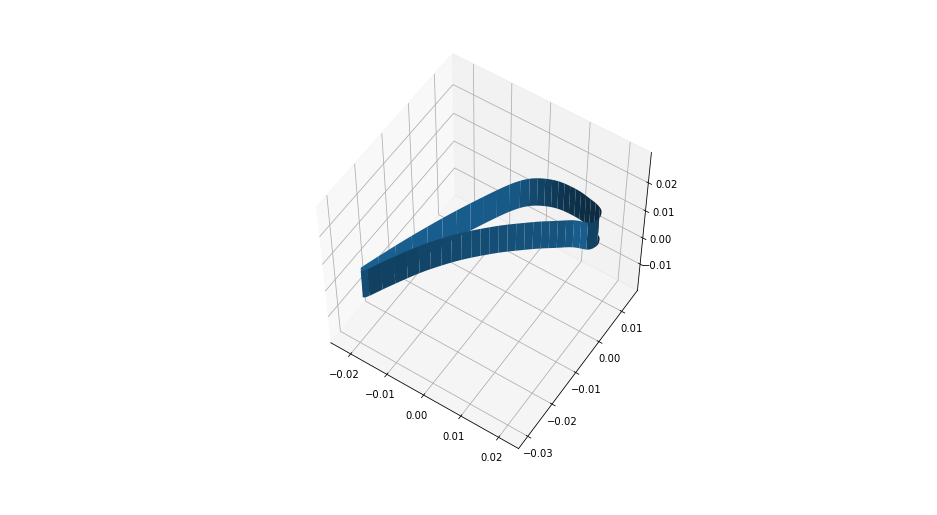

In [46]:
%matplotlib notebook
profile.plot_3d()

<IPython.core.display.Javascript object>


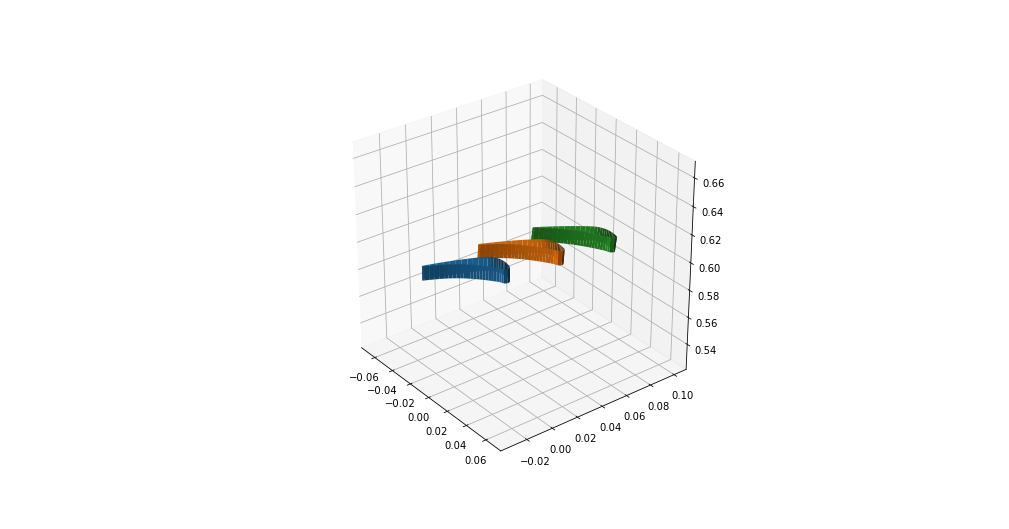

In [48]:
profile.plot_circle(n_blades=3)

<IPython.core.display.Javascript object>


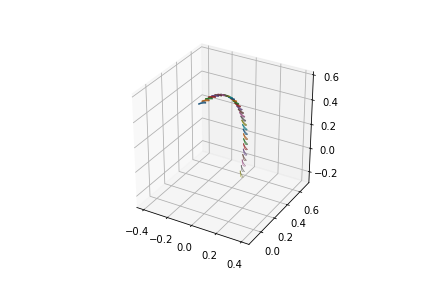

In [55]:
profile.plot_circle(n_blades=int(profile.n_blades / 3))